7 Febuary 2024
# <center>Lab 4 Assignment - CS 4315</center>
<center>Doug Andrade</center>

#### 1. Load the armada.csv file into a `Pandas` data frame.

In [1]:
# Import the Pandas module for data frame operations
import pandas as pd

# Set the csv file name to a object, to avoid hard-coding
csv_file = 'armada.csv'

# Read-in the csv file as a Pandas data frame, as an object to be operated on later
armada_df = pd.read_csv(filepath_or_buffer = csv_file)

armada_df

,Battle,Year,Portuguese Ships,Dutch Ships,English Ships,Ratio of Portuguese Ships to Dutch/British Ships,Spanish Involvement,Portuguese Outcome
0,Bantam,1601,6,3,0,2.000,No,Draw
1,Malacca Strait,1606,14,11,0,1.273,No,Draw
2,Ilha das Naus,1606,6,9,0,0.667,No,Defeat
3,Pulo Butum,1606,7,9,0,0.778,No,Victory
4,Surrat,1615,6,0,4,1.500,No,Draw
5,Ilha das Naus,1615,3,5,0,0.600,No,Defeat
6,Jask,1620,4,0,4,1.000,No,Draw
7,Hormuz,1622,6,0,5,1.200,No,Defeat
8,Mogincoal Shoals,1622,4,4,2,0.667,No,Defeat
9,Hormuz,1625,8,4,4,1.000,No,Draw


#### 2. Return a data frame that contains the rows associated with a Portuguese victory.

In [2]:
# Set the column name and filter category
column_name = 'Portuguese Outcome'
col_val_filter = 'Victory'

# Select the applicable rows (Portuguese victories) by using the series indexing (.loc for the row value)
armada_df.loc[armada_df[column_name] == col_val_filter]

,Battle,Year,Portuguese Ships,Dutch Ships,English Ships,Ratio of Portuguese Ships to Dutch/British Ships,Spanish Involvement,Portuguese Outcome
3,Pulo Butum,1606,7,9,0,0.778,No,Victory
12,Goa,1638,6,8,0,0.750,No,Victory
13,Colombo,1654,5,3,0,1.667,No,Victory
17,Bahia,1625,35,20,0,1.750,Yes,Victory
26,Recife,1653,14,5,0,2.800,Yes,Victory


#### 3. Return the average number of Portuguese ships present in the victories.

In [3]:
# Add an index for the "Portuguese Ships" column with the .mean() function to calculate the average
PT_vict_ships_avg = armada_df.loc[armada_df[column_name] == col_val_filter]['Portuguese Ships'].mean()

# Extract the length of the total ships present in Portuguese victories
PT_num_vict = len(armada_df.loc[armada_df[column_name] == col_val_filter]['Portuguese Ships'])

# Print the average number of Portuguese ships present in victories using string formatting
print('Portugal had an average of %.2f ships in their %d recorded victories.' % (PT_vict_ships_avg, PT_num_vict))

Portugal had an average of 13.40 ships in their 5 recorded victories.


#### 4. Create a bar plot with title and axis labels that visualizes the number of Portuguese ships in each battle (each battle is identified by the location and the year), whether a victory or not. 

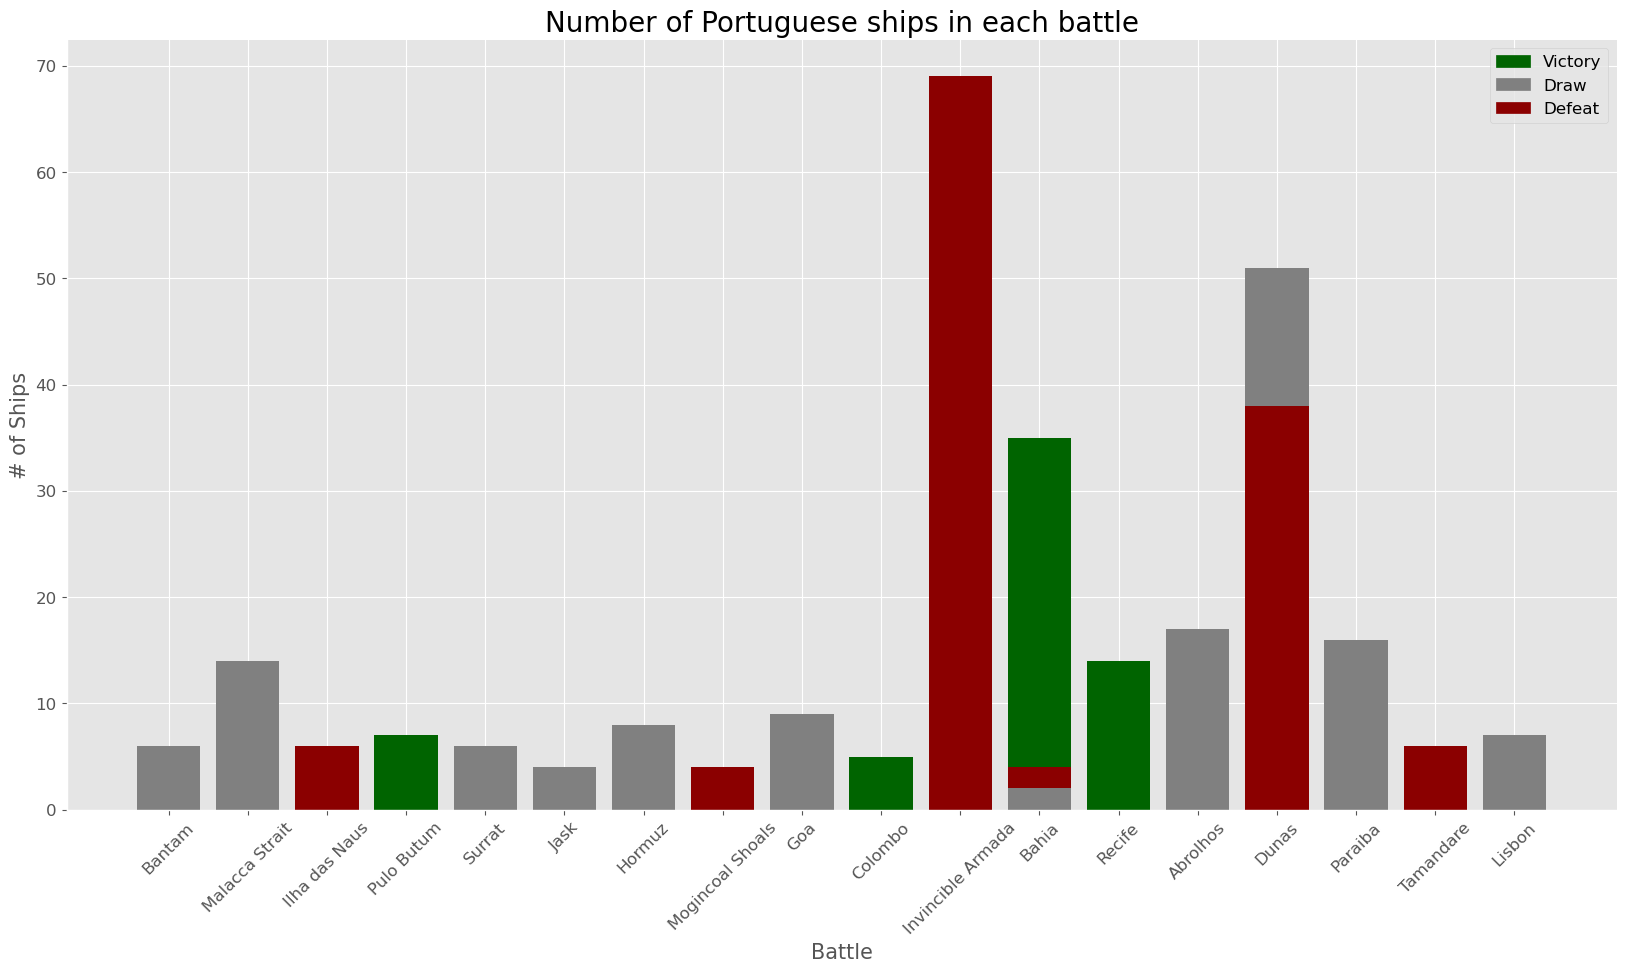

In [4]:
# Import matplotlib.pyplot module for the plotting API
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Magic command useful for Jupyter Notebooks to embed plots within the notebook
%matplotlib inline

# Apply R's ggplot grid and background styling
plt.style.use('ggplot')

# Set the chart size 10x6 for ease of visualization
plt.figure(figsize = (20, 10))

# Conditionally set the color of bars based on victory status
colors = ['darkgreen' if outcome == 'Victory' else 'gray' if outcome == 'Draw' else 'darkred' for outcome in armada_df['Portuguese Outcome']]

# Line plot of x and y, with additional customization - a labeled, dashed green line
plt.bar(armada_df['Battle'], armada_df['Portuguese Ships'], color = colors)

# Create colored rectangles for victory, draw, and defeat icons
victory_patch = mpatches.Patch(color = 'darkgreen', label = 'Victory')
draw_patch = mpatches.Patch(color = 'gray', label = 'Draw')
defeat_patch = mpatches.Patch(color = 'darkred', label = 'Defeat')

# Create a legend with the colored rectangles
plt.legend(handles = [victory_patch, draw_patch, defeat_patch], loc = 'upper right', prop = {'size': 12})

# Add a graph title, x-axis label, set x and y-axis tick mark intervals, and add the legend to the bottom right
plt.title('Number of Portuguese ships in each battle', size = 20)
plt.xlabel('Battle', size = 15)
plt.xticks(rotation = 45, size = 12)
plt.ylabel('# of Ships', size = 15)
plt.yticks(size = 12)

# Remove the right and top border (spines) and add a grid for better visualization
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#### 5. Return a data frame that contains the rows where the Portuguese outnumbered their opponent.

In [5]:
# Select the applicable rows (Ratio > 1) by using the series indexing (.loc for the row value)
armada_df.loc[armada_df['Ratio of Portuguese Ships to Dutch/British Ships'] > 1.000]

,Battle,Year,Portuguese Ships,Dutch Ships,English Ships,Ratio of Portuguese Ships to Dutch/British Ships,Spanish Involvement,Portuguese Outcome
0,Bantam,1601,6,3,0,2.000,No,Draw
1,Malacca Strait,1606,14,11,0,1.273,No,Draw
4,Surrat,1615,6,0,4,1.500,No,Draw
7,Hormuz,1622,6,0,5,1.200,No,Defeat
10,Goa,1636,6,4,0,1.500,No,Draw
13,Colombo,1654,5,3,0,1.667,No,Victory
15,Invincible Armada,1588,69,0,31,2.226,Yes,Defeat
17,Bahia,1625,35,20,0,1.750,Yes,Victory
20,Abrolhos,1631,17,16,0,1.063,Yes,Draw
22,Dunas,1639,51,11,0,4.636,Yes,Draw
